In [1]:
# 1. Import libraries
# Core libraries
import pandas as pd
import numpy as np
# Machine learning - Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import (
    RandomForestRegressor,
    BaggingRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor
)
from sklearn.neural_network import MLPRegressor
# Other ML libraries
import xgboost as xgb
from catboost import CatBoostRegressor
# Deep learning - TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
# Plotting
import matplotlib.pyplot as plt

In [2]:
# 2. Load dataset

J1=0.5
df = pd.read_csv('Wener states training for '+str(J1)+'.csv') 
df=df.dropna()
X = df.drop(columns=["N"])
y = df["N"]

In [3]:
# Explor The Data
print("Data shape:",df.shape)
print("X shape:",X.shape)
print("y shape:",y.shape)

Data shape: (9999, 7)
X shape: (9999, 6)
y shape: (9999,)


In [4]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 4. Scale features (for NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

In [6]:
# 5. Build and train Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

nn_model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

nn_history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100


C:\Users\ahmed167010\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0266 - val_loss: 0.0013
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.0777e-04 - val_loss: 5.1770e-04
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8286e-04 - val_loss: 2.7868e-04
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5009e-04 - val_loss: 1.9892e-04
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8283e-04 - val_loss: 1.6117e-04
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2774e-04 - val_loss: 1.4761e-04
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2043e-04 - val_loss: 1.1712e-04
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1646e-05 - val_loss: 1.4639e-04
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0141e-04 - val_loss: 9.5996e-05
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.6749e-05 - val_loss: 8.5510e-05
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.1507e-05 - val_loss: 7.9004

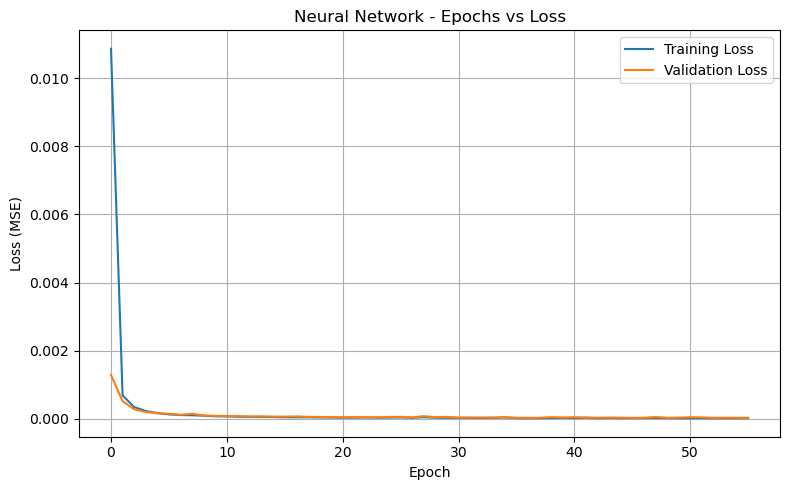

In [7]:
# Plot training and validation loss from the history
plt.figure(figsize=(8, 5))
plt.plot(nn_history.history['loss'], label='Training Loss')
plt.plot(nn_history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network - Epochs vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# 6. Train XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [9]:
# 7. Train ُExtra Trees model
et_model = ExtraTreesRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
et_model.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=10, n_estimators=200, n_jobs=-1, random_state=42)

In [10]:
# 8. Predict with both models
nn_pred = nn_model.predict(X_test_scaled).flatten()
xgb_pred = xgb_model.predict(X_test)
et_pred = et_model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [11]:
# 10. Evaluate models
def evaluate_model(y_true, y_pred, name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Performance:")
    print(f"  MSE: {mse:.6f}")
    print(f"  MAE: {mae:.6f}")
    print(f"  R²: {r2:.6f}\n")

evaluate_model(y_test, nn_pred, "Neural Network")
evaluate_model(y_test, xgb_pred, "XGBoost")
evaluate_model(y_test, et_pred, "Extra Trees")

Neural Network Performance:
  MSE: 0.000024
  MAE: 0.003347
  R²: 0.999581

XGBoost Performance:
  MSE: 0.000750
  MAE: 0.013948
  R²: 0.987022

Extra Trees Performance:
  MSE: 0.001225
  MAE: 0.017950
  R²: 0.978796



In [12]:
# Integrating predictions as inputs to the meta-learner
meta_X = np.column_stack((nn_pred, xgb_pred, et_pred))
meta_y = y_test


# Tain the meta-learner (GradientBoostingRegressor)
#model=MLPRegressor(activation='relu', hidden_layer_sizes=(100,100), max_iter=2000, random_state=42)
#model=RandomForestRegressor(n_estimators=100, random_state=42)
model=CatBoostRegressor(
    n_estimators=1000,
    early_stopping_rounds=50,
    random_state=42,
    verbose=100
)
#model=GradientBoostingRegressor(n_estimators=100, random_state=42)
#model=ExtraTreesRegressor(max_depth=20, max_features=1.0, min_samples_leaf=1, n_estimators=300, random_state=42)
#model=LinearRegression()
meta_learner =model 
meta_learner.fit(meta_X, meta_y)

# Predict the final results
final_preds = meta_learner.predict(meta_X)

# Calculate the metrics (R^2, MSE, MAE)
r2 = r2_score(meta_y, final_preds)
mse = mean_squared_error(meta_y, final_preds)
mae = mean_absolute_error(meta_y, final_preds)

# Print metrics results
print(f"R^2 Score of Stacking Model: {r2}")
print(f"MSE of Stacking Model: {mse}")
print(f"MAE of Stacking Model: {mae}")

Learning rate set to 0.045682
0:	learn: 0.2301064	total: 146ms	remaining: 2m 26s
100:	learn: 0.0113600	total: 542ms	remaining: 4.82s
200:	learn: 0.0072771	total: 716ms	remaining: 2.85s
300:	learn: 0.0054666	total: 887ms	remaining: 2.06s
400:	learn: 0.0045434	total: 1.06s	remaining: 1.58s
500:	learn: 0.0039409	total: 1.23s	remaining: 1.23s
600:	learn: 0.0035508	total: 1.4s	remaining: 931ms
700:	learn: 0.0032488	total: 1.57s	remaining: 672ms
800:	learn: 0.0029975	total: 1.75s	remaining: 434ms
900:	learn: 0.0028132	total: 1.92s	remaining: 211ms
999:	learn: 0.0026582	total: 2.09s	remaining: 0us
R^2 Score of Stacking Model: 0.9998776561075083
MSE of Stacking Model: 7.06608152496206e-06
MAE of Stacking Model: 0.0014787847615335573


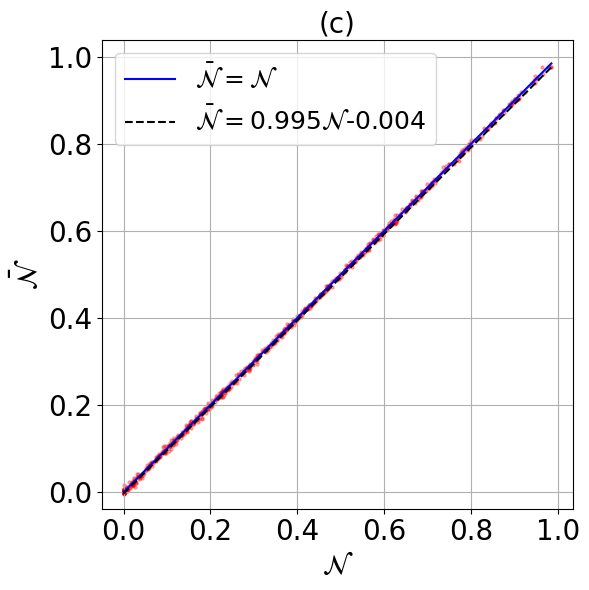

In [13]:

plt.figure(figsize=(6,6))
plt.scatter(y_test, final_preds, alpha=0.3, color='red',s=5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b-', lw=1.5,label=r"$\bar{\mathcal{N}}$"+r"$=\mathcal{N}$")
x1=y_test.min(); x2=y_test.max(); y1=final_preds.min(); y2=final_preds.max();
m=round((y2-y1)/(x2-x1),3); c=round(y1-m*x1,3);
plt.plot([y_test.min(), y_test.max()], [final_preds.min(), final_preds.max()], 'k--', lw=1.5,\
         label=r"$\bar{\mathcal{N}}= $"+str(m)+ r"$ \mathcal{N} $"+str(c))
plt.xlabel(r"$\mathcal{N}$",fontsize=20)
plt.ylabel(r"$\bar{\mathcal{N}}$",fontsize=20)
plt.title(r"(c)",fontsize=20)
plt.legend(fontsize=18)
plt.grid(True)
plt.axis("equal")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,1)
plt.tight_layout()
#plt.savefig("werner_state_five_meta.png", dpi=800,bbox_inches='tight')
plt.show()

In [14]:
############################################################################################################3
##############################################################################################################
##############################################################################################################

In [15]:

# 8. Predict with both models
nn_p = nn_model.predict(X_scaled).flatten()
xgb_p = xgb_model.predict(X)
et_p = et_model.predict(X)
# Integrating predictions as inputs to the meta-learner
meta_X = np.column_stack((nn_p, xgb_p, et_p))
meta_y = y

# Tain the meta-learner (GradientBoostingRegressor)
meta_learner = model

meta_learner.fit(meta_X, meta_y)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step
Learning rate set to 0.058908
0:	learn: 0.2278209	total: 5.99ms	remaining: 5.98s
100:	learn: 0.0080472	total: 561ms	remaining: 4.99s
200:	learn: 0.0052162	total: 1.11s	remaining: 4.42s
300:	learn: 0.0041013	total: 1.67s	remaining: 3.87s
400:	learn: 0.0036312	total: 2.27s	remaining: 3.39s
500:	learn: 0.0033707	total: 2.87s	remaining: 2.86s
600:	learn: 0.0032075	total: 3.12s	remaining: 2.07s
700:	learn: 0.0030972	total: 3.38s	remaining: 1.44s
800:	learn: 0.0030121	total: 3.63s	remaining: 902ms
900:	learn: 0.0029282	total: 3.88s	remaining: 426ms
999:	learn: 0.0028655	total: 4.38s	remaining: 0us


In [16]:
#The predicting for special class of states

In [17]:
tested_data=pd.read_csv('Werner states tested for '+str(J1)+'.csv')  
tested_data

,Unnamed: 0,α_1_re,α_2_re,α_3_re,α_4_re,s,N
0,0,0.707107,0.0,0.0,0.707107,0.0000,0.00000
1,1,0.707107,0.0,0.0,0.707107,0.0001,0.00000
2,2,0.707107,0.0,0.0,0.707107,0.0002,0.00000
3,3,0.707107,0.0,0.0,0.707107,0.0003,0.00000
4,4,0.707107,0.0,0.0,0.707107,0.0004,0.00000
...,...,...,...,...,...,...,...
9995,9995,0.707107,0.0,0.0,0.707107,0.9996,0.99940
9996,9996,0.707107,0.0,0.0,0.707107,0.9997,0.99955
9997,9997,0.707107,0.0,0.0,0.707107,0.9998,0.99970
9998,9998,0.707107,0.0,0.0,0.707107,0.9999,0.99985


In [18]:

X=tested_data.drop('N',axis=1)
y=tested_data['N']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#X_test_scaled = scaler.transform(X_test)
#X_scaled = scaler.transform(X)
X

,Unnamed: 0,α_1_re,α_2_re,α_3_re,α_4_re,s
0,0,0.707107,0.0,0.0,0.707107,0.0000
1,1,0.707107,0.0,0.0,0.707107,0.0001
2,2,0.707107,0.0,0.0,0.707107,0.0002
3,3,0.707107,0.0,0.0,0.707107,0.0003
4,4,0.707107,0.0,0.0,0.707107,0.0004
...,...,...,...,...,...,...
9995,9995,0.707107,0.0,0.0,0.707107,0.9996
9996,9996,0.707107,0.0,0.0,0.707107,0.9997
9997,9997,0.707107,0.0,0.0,0.707107,0.9998
9998,9998,0.707107,0.0,0.0,0.707107,0.9999


In [19]:
# 8. Predict with both models
nn_X = nn_model.predict(X_scaled).flatten()
xgb_X = xgb_model.predict(X)
et_X = et_model.predict(X)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [20]:

# Integrating predictions as inputs to the meta-learner
meta_X_t = np.column_stack((nn_X, xgb_X, et_X))
meta_learner.fit(meta_X_t,y)
# Predict the final results
y_pred = meta_learner.predict(meta_X_t)


Learning rate set to 0.058909
0:	learn: 0.3144057	total: 9.98ms	remaining: 9.97s
100:	learn: 0.0042041	total: 619ms	remaining: 5.51s
200:	learn: 0.0027121	total: 1.18s	remaining: 4.69s
300:	learn: 0.0021042	total: 1.75s	remaining: 4.07s
400:	learn: 0.0018015	total: 2.06s	remaining: 3.07s
500:	learn: 0.0015857	total: 2.34s	remaining: 2.33s
600:	learn: 0.0014466	total: 2.63s	remaining: 1.75s
700:	learn: 0.0013458	total: 2.97s	remaining: 1.26s
800:	learn: 0.0012644	total: 3.55s	remaining: 881ms
900:	learn: 0.0011977	total: 4.13s	remaining: 454ms
999:	learn: 0.0011507	total: 4.7s	remaining: 0us


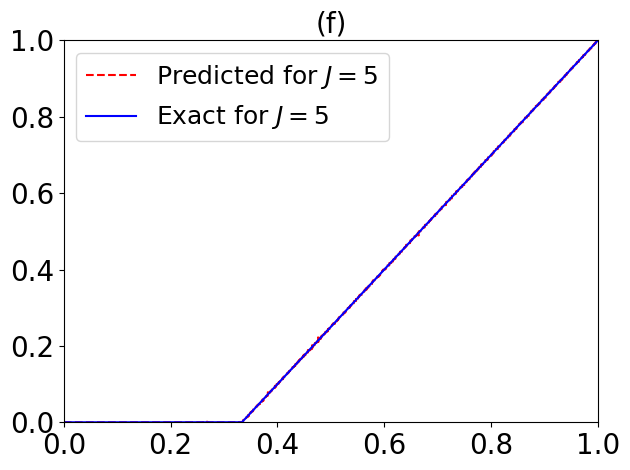

In [21]:
s=tested_data['s']
plt.plot(s,y_pred,label='Predicted for '+r"$J=5$",linestyle='--',color='red')
plt.plot(s,tested_data['N'],color='blue',label="Exact for "+r"$J=5$",linestyle='-')
plt.title(r"(f)",fontsize=20)
plt.xlim(0,1)
plt.legend()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=18)
plt.ylim(0,1)
plt.tight_layout()
#plt.savefig("werner_state_five_tested.png", dpi=800,bbox_inches='tight')
plt.show()